<a href="https://colab.research.google.com/github/nithishwar85/Fake-news-detection/blob/main/Fake_new_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [6]:
import pandas as pd

data = pd.concat([data_fake, data_true], axis=0)
data = data.sample(frac=1).reset_index(drop=True)  # shuffle

X = data["text"]
y = data["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: name 'data_fake' is not defined

In [ ]:
data_fake = pd.read_csv("Fake.csv")
data_true = pd.read_csv("True.csv")

data_fake["label"] = 0
data_true["label"] = 1

In [5]:
!pip install -q kaggle
!mv "kaggle (2).json" kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset -p /content/
!unzip -o /content/fake-and-real-news-dataset.zip -d /content/
!ls /content

mv: cannot stat 'kaggle (2).json': No such file or directory
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'
unzip:  cannot find or open /content/fake-and-real-news-dataset.zip, /content/fake-and-real-new

In [ ]:
from google.colab import files
files.upload()   # choose kaggle.json from your computer


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nithishwar85","key":"919a24a23cfe89bdf8155db0d57408d0"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset -p /content/
!unzip -o /content/fake-and-real-news-dataset.zip -d /content/
!ls /content


Dataset URL: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset
License(s): CC-BY-NC-SA-4.0
  0% 0.00/41.0M [00:00<?, ?B/s]
100% 41.0M/41.0M [00:00<00:00, 1.24GB/s]
Archive:  /content/fake-and-real-news-dataset.zip
  inflating: /content/Fake.csv       
  inflating: /content/True.csv       
fake-and-real-news-dataset.zip	Fake.csv  kaggle.json  sample_data  True.csv


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [ ]:
data = pd.concat([data_fake, data_true], axis=0)
data = data.sample(frac=1).reset_index(drop=True)  # shuffle



In [ ]:
X = data["text"]   # News text
y = data["label"]  # Labels (0 = Fake, 1 = True)



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)



In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test_vec)


In [ ]:
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.9839643652561247

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      4706
           1       0.98      0.98      0.98      4274

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



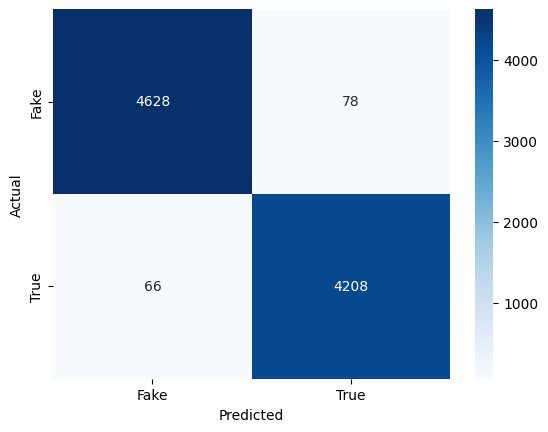

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "True"], yticklabels=["Fake", "True"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
import pandas as pd

In [ ]:
data_fake = pd.read_csv('/content/Fake.csv')
data_true = pd.read_csv('/content/True.csv')



In [ ]:
print("Fake news shape:", data_fake.shape)
print("True news shape:", data_true.shape)

Fake news shape: (23481, 4)
True news shape: (21417, 4)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenization
max_words = 5000
max_len = 300

tokenizer = Tokenizer(num_words=max_words, lower=True)
tokenizer.fit_on_texts(X)

X_seq = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=max_len)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

# Build LSTM model
model = Sequential()
model.add(Embedding(max_words, 128, input_length=max_len))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, epochs=3, batch_size=64, validation_data=(X_test, y_test), verbose=1)

# Evaluate
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"✅ LSTM Model Accuracy: {acc:.2f}")

Epoch 1/3


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


562/562 ━━━━━━━━━━━━━━━━━━━━ 480s 846ms/step - accuracy: 0.9303 - loss: 0.2025 - val_accuracy: 0.9850 - val_loss: 0.0524
Epoch 2/3
562/562 ━━━━━━━━━━━━━━━━━━━━ 480s 853ms/step - accuracy: 0.9840 - loss: 0.0521 - val_accuracy: 0.9884 - val_loss: 0.0429
Epoch 3/3
562/562 ━━━━━━━━━━━━━━━━━━━━ 500s 850ms/step - accuracy: 0.9894 - loss: 0.0369 - val_accuracy: 0.9898 - val_loss: 0.0324
✅ LSTM Model Accuracy: 0.99


In [ ]:
!pip install transformers -q

import numpy as np
import pandas as pd
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# =====================
# 1. Load dataset
# =====================
fake = pd.read_csv("/content/Fake.csv")
true = pd.read_csv("/content/True.csv")

fake["label"] = 0   # Fake = 0
true["label"] = 1   # True = 1

df = pd.concat([fake, true], axis=0).reset_index(drop=True)

# Combine title + text (better than text alone)
df["content"] = df["title"].astype(str) + " " + df["text"].astype(str)

X = df["content"].tolist()
y = df["label"].tolist()

# =====================
# 2. Train/Test split
# =====================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# =====================
# 3. Tokenizer
# =====================
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

train_encodings = tokenizer(
    X_train,
    truncation=True,
    padding="max_length",
    max_length=256
)

test_encodings = tokenizer(
    X_test,
    truncation=True,
    padding="max_length",
    max_length=256
)

# =====================
# 4. TF Dataset
# =====================
train_dataset = tf.data.Dataset.from_tensor_slices((
    {
        "input_ids": np.array(train_encodings["input_ids"]),
        "attention_mask": np.array(train_encodings["attention_mask"])
    },
    np.array(y_train)
))

test_dataset = tf.data.Dataset.from_tensor_slices((
    {
        "input_ids": np.array(test_encodings["input_ids"]),
        "attention_mask": np.array(test_encodings["attention_mask"])
    },
    np.array(y_test)
))

train_dataset = train_dataset.shuffle(10000).batch(16)
test_dataset = test_dataset.batch(16)

# =====================
# 5. Build model
# =====================
bert_model = TFBertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=2
)

optimizer = Adam(learning_rate=3e-5)
bert_model.compile(
    optimizer=optimizer,
    loss=bert_model.compute_loss,
    metrics=["accuracy"]
)

# =====================
# 6. Train
# =====================
bert_model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=2
)

# =====================
# 7. Evaluate
# =====================
loss, acc = bert_model.evaluate(test_dataset)
print(f"✅ BERT Model Accuracy: {acc:.2f}")


FileNotFoundError: [Errno 2] No such file or directory: '/content/Fake.csv'

In [ ]:
!unzip -o /content/fake-and-real-news-dataset.zip -d /content/

unzip:  cannot find or open /content/fake-and-real-news-dataset.zip, /content/fake-and-real-news-dataset.zip.zip or /content/fake-and-real-news-dataset.zip.ZIP.


In [ ]:
from google.colab import files
files.upload()   # Choose kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nithishwar85","key":"919a24a23cfe89bdf8155db0d57408d0"}'}